# CODE_3

## Target:
* add transforms and set correct channels so to meet the initial requirement. and also use lr scheduler to the best
## Results:
* Model Parameters : 7,652
* Best Training accuracy : 99.29 
* Best Testing accuracy : 99.49
## Analysis:
* Model is underfitting. 
* able to achieve more than 99.4 consistenly because of maxpooling twice which increase rf and transforms made 1% improvement 

CUDA Available? True


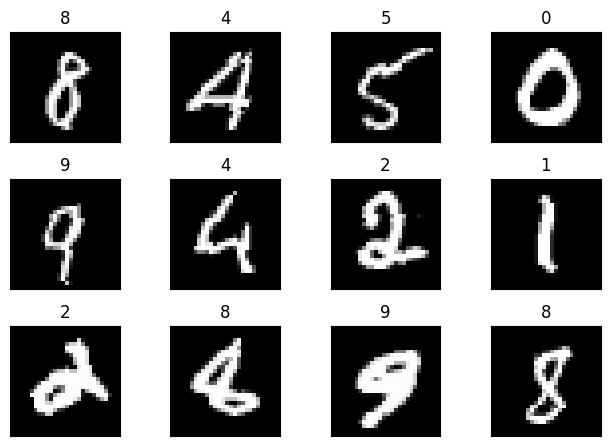

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import os
# os['KMP_DUPLICATE_LIB_OK']='True'
# CUDA?
cuda = torch.cuda.is_available()

# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("CUDA Available?", cuda)
# Train data transformations

train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(26), ], p=0.1),
    transforms.Resize((28,28)),
    transforms.ColorJitter(brightness=0.05, contrast=0.05, saturation=0.05, hue=0.05),
    transforms.RandomRotation((-10., 10.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)
batch_size = 128

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)
from utils import return_dataset_images

return_dataset_images(train_loader, 12)

In [3]:
!pip install torchsummary
from model import Net3, train, test, model_summary

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

model = Net3().to(device)
model_summary(model, (1,28,28))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
              ReLU-2            [-1, 8, 26, 26]               0
       BatchNorm2d-3            [-1, 8, 26, 26]              16
           Dropout-4            [-1, 8, 26, 26]               0
            Conv2d-5           [-1, 12, 24, 24]             864
              ReLU-6           [-1, 12, 24, 24]               0
       BatchNorm2d-7           [-1, 12, 24, 24]              24
           Dropout-8           [-1, 12, 24, 24]               0
         MaxPool2d-9           [-1, 12, 12, 12]               0
           Conv2d-10            [-1, 8, 12, 12]              96
           Conv2d-11           [-1, 12, 10, 10]             864
             ReLU-12           [-1, 12, 10, 10]               0
    

In [4]:

optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
# scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
# scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min',factor=0.1, patience=7)
scheduler = optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.02, epochs=15, steps_per_epoch=len(train_loader))
criterion = nn.CrossEntropyLoss()
num_epochs = 15

for epoch in range(1, num_epochs+1):
  # print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion,scheduler)
  tl=test(model, device, test_loader)
  # scheduler.step(tl)

Loss=0.20842158794403076 Batch_id=468 Accuracy=72.23: 100%|██████████| 469/469 [00:46<00:00, 10.10it/s]



Test set: Average loss: 0.1999, Accuracy: 9561/10000 (95.61%)



Loss=0.11221128702163696 Batch_id=468 Accuracy=96.19: 100%|██████████| 469/469 [00:42<00:00, 10.95it/s]



Test set: Average loss: 0.0954, Accuracy: 9719/10000 (97.19%)



Loss=0.09651211649179459 Batch_id=468 Accuracy=97.46: 100%|██████████| 469/469 [00:43<00:00, 10.83it/s]



Test set: Average loss: 0.0526, Accuracy: 9835/10000 (98.35%)



Loss=0.03152831643819809 Batch_id=468 Accuracy=97.94: 100%|██████████| 469/469 [00:42<00:00, 11.03it/s]



Test set: Average loss: 0.0387, Accuracy: 9881/10000 (98.81%)



Loss=0.03815401718020439 Batch_id=468 Accuracy=98.33: 100%|██████████| 469/469 [00:43<00:00, 10.84it/s]



Test set: Average loss: 0.0471, Accuracy: 9861/10000 (98.61%)



Loss=0.045435234904289246 Batch_id=468 Accuracy=98.48: 100%|██████████| 469/469 [00:43<00:00, 10.79it/s]



Test set: Average loss: 0.0405, Accuracy: 9879/10000 (98.79%)



Loss=0.013346790336072445 Batch_id=468 Accuracy=98.59: 100%|██████████| 469/469 [00:42<00:00, 10.97it/s]



Test set: Average loss: 0.0254, Accuracy: 9917/10000 (99.17%)



Loss=0.03807458654046059 Batch_id=468 Accuracy=98.75: 100%|██████████| 469/469 [00:41<00:00, 11.37it/s]



Test set: Average loss: 0.0225, Accuracy: 9926/10000 (99.26%)



Loss=0.02004966512322426 Batch_id=468 Accuracy=98.86: 100%|██████████| 469/469 [00:40<00:00, 11.50it/s]



Test set: Average loss: 0.0218, Accuracy: 9930/10000 (99.30%)



Loss=0.04408091679215431 Batch_id=468 Accuracy=98.98: 100%|██████████| 469/469 [00:41<00:00, 11.40it/s]



Test set: Average loss: 0.0231, Accuracy: 9928/10000 (99.28%)



Loss=0.04186120256781578 Batch_id=468 Accuracy=99.01: 100%|██████████| 469/469 [00:40<00:00, 11.47it/s]



Test set: Average loss: 0.0194, Accuracy: 9940/10000 (99.40%)



Loss=0.0762559175491333 Batch_id=468 Accuracy=99.09: 100%|██████████| 469/469 [00:42<00:00, 11.05it/s]



Test set: Average loss: 0.0190, Accuracy: 9941/10000 (99.41%)



Loss=0.014713129960000515 Batch_id=468 Accuracy=99.20: 100%|██████████| 469/469 [00:40<00:00, 11.59it/s]



Test set: Average loss: 0.0170, Accuracy: 9950/10000 (99.50%)



Loss=0.010054277256131172 Batch_id=468 Accuracy=99.25: 100%|██████████| 469/469 [00:41<00:00, 11.25it/s]



Test set: Average loss: 0.0162, Accuracy: 9949/10000 (99.49%)



Loss=0.006205342244356871 Batch_id=468 Accuracy=99.29: 100%|██████████| 469/469 [00:39<00:00, 11.77it/s]



Test set: Average loss: 0.0166, Accuracy: 9949/10000 (99.49%)

